In [257]:
import torch
from torch import nn

## Самостоятельная реализация свертки

In [258]:
def corr2d(X, K):  
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i: i + h, j: j + w] * K).sum()
    return Y

In [259]:
X = torch.Tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
K = torch.Tensor([[0, 1], [2, 3]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

## Детекция граней

In [260]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [261]:
## вертикальные грани есть
K = torch.Tensor([[1, -1]])
Y = corr2d(X, K)
print(X)
print(Y)

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])
tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])


In [262]:
## вертикальных граней нет
Z = corr2d(X.T, K)
print(X.T)
print(Z)

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


## Сверточный слой

In [263]:
X = X.reshape(1, 1, 6, 8)
Y = Y.reshape(1, 1, 6, 7)

In [264]:
conv2d = torch.nn.Conv2d(1, 1, (1,2))

In [265]:
trainer = torch.optim.SGD(conv2d.parameters(), lr=0.001)

In [266]:
for i in range(500):
    trainer.zero_grad()
    Y_hat = conv2d(X)
    l = ((Y_hat - Y) ** 2).sum()
    l.backward()
    trainer.step()
    if (i + 1) % 2 == 0:
        print('batch %d, loss %.3f' % (i + 1, l.item()))

batch 2, loss 29.746
batch 4, loss 25.413
batch 6, loss 22.484
batch 8, loss 20.401
batch 10, loss 18.831
batch 12, loss 17.581
batch 14, loss 16.534
batch 16, loss 15.621
batch 18, loss 14.803
batch 20, loss 14.053
batch 22, loss 13.356
batch 24, loss 12.703
batch 26, loss 12.087
batch 28, loss 11.504
batch 30, loss 10.952
batch 32, loss 10.427
batch 34, loss 9.929
batch 36, loss 9.454
batch 38, loss 9.003
batch 40, loss 8.574
batch 42, loss 8.165
batch 44, loss 7.776
batch 46, loss 7.405
batch 48, loss 7.053
batch 50, loss 6.717
batch 52, loss 6.397
batch 54, loss 6.093
batch 56, loss 5.803
batch 58, loss 5.527
batch 60, loss 5.265
batch 62, loss 5.014
batch 64, loss 4.776
batch 66, loss 4.549
batch 68, loss 4.333
batch 70, loss 4.128
batch 72, loss 3.932
batch 74, loss 3.745
batch 76, loss 3.567
batch 78, loss 3.398
batch 80, loss 3.237
batch 82, loss 3.083
batch 84, loss 2.937
batch 86, loss 2.798
batch 88, loss 2.665
batch 90, loss 2.539
batch 92, loss 2.419
batch 94, loss 2.304
b

In [267]:
print(conv2d.weight)
print(conv2d.bias)

Parameter containing:
tensor([[[[ 0.9968, -0.9968]]]], requires_grad=True)
Parameter containing:
tensor([-7.9746e-06], requires_grad=True)


## Padding и stride

In [268]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.randn((1, 1, 8, 8))
conv2d(X).shape

torch.Size([1, 1, 8, 8])

In [269]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
X = torch.randn((1, 1, 8, 8))
conv2d(X).shape

torch.Size([1, 1, 4, 4])

## Каналы

In [270]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.randn((1, 1, 8, 8))
conv2d(X).shape

torch.Size([1, 1, 8, 8])

In [271]:
conv2d.weight.shape

torch.Size([1, 1, 3, 3])

In [272]:
conv2d = nn.Conv2d(3, 32, kernel_size=3, padding=1)
X = torch.randn((1, 3, 8, 8))
conv2d(X).shape

torch.Size([1, 32, 8, 8])

In [273]:
conv2d.weight.shape

torch.Size([32, 3, 3, 3])

## Pooling

In [274]:
def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

In [275]:
X = torch.Tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(X)
print(pool2d(X, (2, 2)))

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])
tensor([[4., 5.],
        [7., 8.]])


In [276]:
pool2d(X, (2, 2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

In [277]:
X = torch.arange(16).reshape((1, 1, 4, 4)).type(torch.float)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [278]:
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

In [279]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [280]:
pool2d = nn.MaxPool2d((2, 3), padding=(1, 1), stride=(2, 3))
pool2d(X)

tensor([[[[ 1.,  3.],
          [ 9., 11.],
          [13., 15.]]]])

In [281]:
X = torch.cat((X, X + 1), dim=1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [282]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

## Lenet

In [283]:
import torchvision as tv
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [284]:
BATCH_SIZE=256

In [285]:
train_dataset = tv.datasets.MNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.MNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

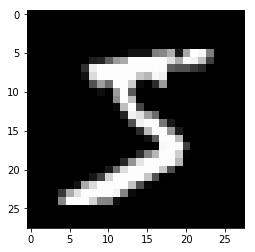

In [286]:
plt.imshow(train_dataset[0][0].numpy().reshape(28,28), cmap='gray')

In [317]:
model = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    nn.Conv2d(6, 12, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    nn.Flatten(),
    nn.Linear(300, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)

In [288]:
X = train_dataset[0][0]
X = X.reshape(1, 1, 28, 28)
print(X.shape)
for l in model:
    X = l(X)
    print("Layer {}. X shape: {}".format(l, X.shape))

torch.Size([1, 1, 28, 28])
Layer Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)). X shape: torch.Size([1, 6, 28, 28])
Layer ReLU(). X shape: torch.Size([1, 6, 28, 28])
Layer AvgPool2d(kernel_size=2, stride=2, padding=0). X shape: torch.Size([1, 6, 14, 14])
Layer Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1)). X shape: torch.Size([1, 12, 10, 10])
Layer ReLU(). X shape: torch.Size([1, 12, 10, 10])
Layer AvgPool2d(kernel_size=2, stride=2, padding=0). X shape: torch.Size([1, 12, 5, 5])
Layer Flatten(). X shape: torch.Size([1, 300])
Layer Linear(in_features=300, out_features=50, bias=True). X shape: torch.Size([1, 50])
Layer ReLU(). X shape: torch.Size([1, 50])
Layer Linear(in_features=50, out_features=10, bias=True). X shape: torch.Size([1, 10])


In [289]:
X = train_dataset[0][0]
X = X.reshape(1, 1, 28, 28)
y = model(X)
print(y.shape)

torch.Size([1, 10])


In [290]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = torch.Tensor([0]), 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [318]:
def train(net, train_iter, test_iter, trainer, num_epochs):
    loss = nn.CrossEntropyLoss(reduction='sum')
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
        for X, y in train_iter:
            trainer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, '
              'time %.1f sec'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc,
                 time.time() - start))

In [319]:
lr, num_epochs = 0.001, 5
trainer = torch.optim.SGD(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs)

epoch 1, loss 0.6727, train acc 0.789, test acc 0.954, time 12.5 sec
epoch 2, loss 0.1289, train acc 0.960, test acc 0.969, time 12.3 sec
epoch 3, loss 0.0897, train acc 0.973, test acc 0.975, time 12.5 sec
epoch 4, loss 0.0718, train acc 0.978, test acc 0.978, time 12.7 sec
epoch 5, loss 0.0610, train acc 0.981, test acc 0.980, time 12.5 sec


## Обучение на GPU

In [320]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [321]:
dev

device(type='cpu')

In [322]:
model = model.to(dev)

In [323]:
def train(net, train_iter, test_iter, trainer, num_epochs, dev):
    loss = nn.CrossEntropyLoss(reduction='sum')
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
        for X, y in train_iter:
            trainer.zero_grad()
            X, y = X.to(dev), y.to(dev)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net, dev)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, '
              'time %.1f sec'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc,
                 time.time() - start))

In [324]:
def evaluate_accuracy(data_iter, net, dev):
    acc_sum, n = torch.Tensor([0]).to(dev), 0
    for X, y in data_iter:
        X, y = X.to(dev), y.to(dev)
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [325]:
lr, num_epochs = 0.001, 5
trainer = torch.optim.SGD(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs, dev)

epoch 1, loss 0.0532, train acc 0.983, test acc 0.982, time 13.3 sec
epoch 2, loss 0.0478, train acc 0.985, test acc 0.983, time 13.2 sec
epoch 3, loss 0.0433, train acc 0.987, test acc 0.984, time 13.6 sec
epoch 4, loss 0.0394, train acc 0.988, test acc 0.984, time 13.0 sec
epoch 5, loss 0.0360, train acc 0.989, test acc 0.985, time 12.9 sec


## Аугментация данных

In [341]:
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j], cmap='gray')
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    plt.show()

In [342]:
def apply(img, aug, num_rows=2, num_cols=4, scale=2):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

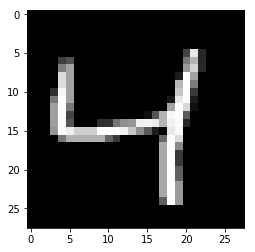

In [347]:
dataset = tv.datasets.MNIST('.', train=True, download=True)
img = dataset[2][0]
plt.imshow(img, cmap='gray')

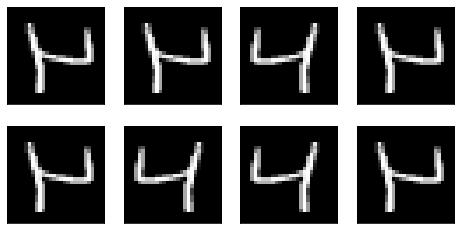

In [348]:
apply(img, tv.transforms.RandomHorizontalFlip())

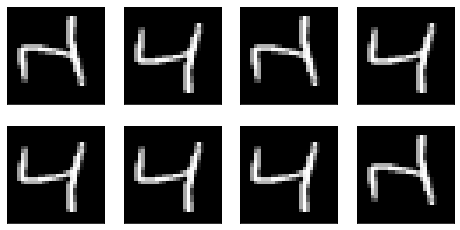

In [349]:
apply(img, tv.transforms.RandomVerticalFlip())

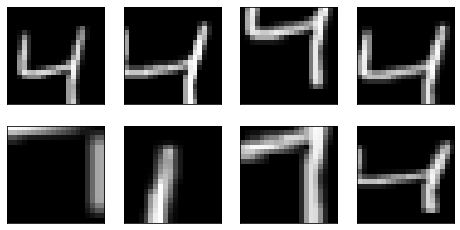

In [362]:
## A crop of random size (default: of 0.08 to 1.0) of the original size and a random aspect ratio
## (default: of 3/4 to 4/3) of the original aspect ratio is made.
## This crop is finally resized to given size. 
apply(img, tv.transforms.RandomResizedCrop((20,20), scale=(0.1, 1.), ratio=(0.5, 2)))

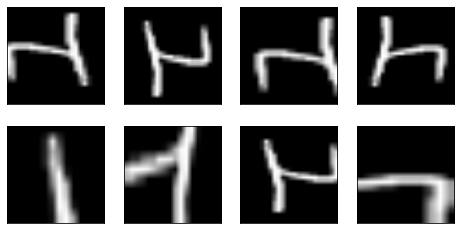

In [354]:
augs = tv.transforms.Compose([
    tv.transforms.RandomHorizontalFlip(),
    tv.transforms.RandomVerticalFlip(),
    tv.transforms.RandomResizedCrop(
        (200, 200), scale=(0.1, 1), ratio=(0.5, 2))])
apply(img, augs)

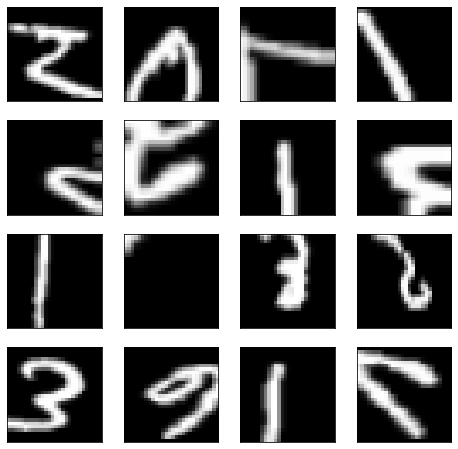

In [358]:
augs = tv.transforms.Compose([
    tv.transforms.RandomHorizontalFlip(),
    tv.transforms.RandomVerticalFlip(),
    tv.transforms.RandomResizedCrop(
        (28, 28), scale=(0.1, 1), ratio=(0.5, 2)),
    tv.transforms.ToTensor()])
dataset = tv.datasets.MNIST('.', train=True, transform=augs, download=True)
loader = torch.utils.data.DataLoader(dataset, batch_size=16)

for X, _ in loader:
    X = X.reshape(16, 28, 28)
    show_images(X, 4, 4)
    break